<a href="https://colab.research.google.com/github/Faiqazmi/RepoTugasBesar_TKC_047_059/blob/main/Tugas_6_TKC_047_059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files #import lib
files.upload() #upload file, dalam kasus praktikum kali ini yang di upload file kaggle.json

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"hexazor","key":"663a14597732196faa9d3257dd4ff4df"}'}

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"hexazor","key":"663a14597732196faa9d3257dd4ff4df"}
import json
import zipfile
import os
with open('kaggle.json', 'w') as file: #membuka file kaggle.json yang telah diupload
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle #membuat directory bernama kaggle 
!cp kaggle.json ~/.kaggle/ #copy file kaggle.json upload tadi ke directory baru
!chmod 600 ~/.kaggle/kaggle.json #berikan izin untuk file kaggle.json

In [ ]:
#Unduh dataset
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 320M/325M [00:02<00:00, 121MB/s]
100% 325M/325M [00:03<00:00, 113MB/s]


In [ ]:
#ekstraksi zip
from zipfile import ZipFile #library
file_name = "skin-cancer-malignant-vs-benign.zip" #nama file yang telah di download

with ZipFile(file_name,'r') as zip : #file dibaca dengan alias zip
  zip.extractall() #ini kalo gk salah buat tempat hasil nya. karena gak ada, ya default ke content
  print('Berhasil') #ini print

Berhasil


In [ ]:
import os
testbenign = "/content/data/test/benign" #inisialisasi path test benign
testmalignant = "/content/data/test/malignant" #inisialisasi path test malignant
trainbenign = "/content/data/train/benign" #inisialisasi path train benign
trainmalignant = "/content/data/train/malignant" #inisialisasi path train malignant

test_b = os.listdir(testbenign) #mengembalikan folder tertentu berisi nama folder testbenign yang telah diinisialisasi
test_m = os.listdir(testmalignant) #mengembalikan folder tertentu berisi nama folder testbmalignant yang telah diinisialisasi
train_b = os.listdir(trainbenign) #mengembalikan folder tertentu berisi nama folder trainbenign yang telah diinisialisasi
train_m = os.listdir(trainmalignant) #mengembalikan folder tertentu berisi nama folder trainmalignant yang telah diinisialisasi

print ("Jumlah Train Benign :"+ str(len(train_b))) #print jumlah train benign
print ("Jumlah Train Malignant :"+ str(len(train_m))) #print jumlah train malignant
print ("Jumlah Test Benign :"+ str(len(test_b))) #print jumlah tes benign
print ("Jumlah Test Malignant :"+ str(len(test_m))) #print jumlah tes malignant

Jumlah Train Benign :1440
Jumlah Train Malignant :1197
Jumlah Test Benign :360
Jumlah Test Malignant :300


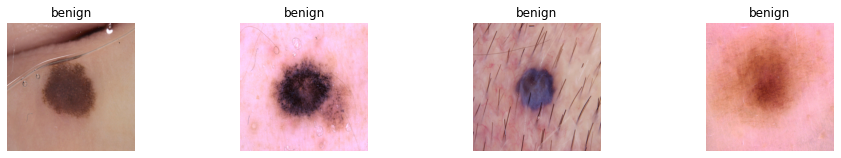

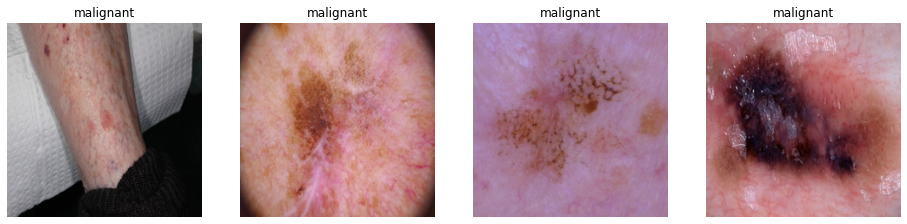

In [ ]:
#tampilkan sample
import matplotlib.pyplot as plt #library
import matplotlib.image as mping #library

file_train_benign=os.path.join("data/train/benign") #mengambil path 
file_train_malignant=os.path.join("data/train/malignant") #mengambil path

benign_image = os.listdir(file_train_benign) #mengembalikan folder tertentu berisi nama folder trainbenign yang telah diinisialisasi
malignant_image = os.listdir(file_train_malignant) #mengembalikan folder tertentu berisi nama folder trainmalignant yang telah diinisialisasi

fname1 = [os.path.join(file_train_benign,fname)
        for fname in benign_image[:4]] #mengambil file dalam path yang telah diinisialisasi diatas sebanyak 4 buah

fname2 = [os.path.join(file_train_malignant,fname)
        for fname in malignant_image[:4]] #mengambil file dalam path yang telah diinisialisasi diatas sebanyak 4 buah

ncolu = 4 #inisialisasi var
nrow = 2 #inisialisasi var
fig = plt.gcf() #mengatur figure/canvas
fig.set_size_inches(ncolu*4,nrow*4) #mengatur ukuran canvas
for i,fname in enumerate(fname1): #perulangan, enumerate berfungsi untuk memberikan nilai angka pada tiap2 file yang dipanggil --> (0, gmbr benign), (1, gmbr malignant)
    sp = plt.subplot(3,4,i+1) #berfungsi untuk peletakan file di dalam canvas
    sp.axis('off') #gak ada penggaris disamping foto
    img = mping.imread(fname) #membaca gambar sebagai array
    plt.title('benign')#ini title
    plt.imshow(img)#menampilkan tiap image

plt.show()#menampilkan image dalam canvas

ncolu = 4 #inisialisasi var
nrow = 2 #inisialisasi var
fig = plt.gcf()#mengatur figure/canvas
fig.set_size_inches(ncolu*4,nrow*4)#mengatur ukuran canvas
for i,fname in enumerate(fname2):#perulangan, enumerate berfungsi untuk memberikan nilai angka pada tiap2 file yang dipanggil --> (0, gmbr benign), (1, gmbr malignant)
    sp = plt.subplot(2,4,i+1)#berfungsi untuk peletakan file di dalam canvas
    sp.axis('off')#gak ada penggaris disamping foto
    img = mping.imread(fname)#membaca gambar sebagai array
    plt.title('malignant')#ini title
    plt.imshow(img)#menampilkan tiap image
    
plt.show()#menampilkan image dalam canvas

Preprocessing


In [ ]:
import cv2 #library
import numpy as np #library

#data train
train_data = [] #inisialisasi var dg hasil list kosong
train_label = [] #inisialisasi var dg hasil list kosong

train_dir=os.path.join("data/train") #mengambil path train
for r, d, f in os.walk(train_dir): #perulangan root,dir,file berfungsi untuk mendapatkan file, jadi dari root ke dir ke file smpai ketemu yang bener2 file
    for file in f: #yepp dah ketemu file nya
        if ".jpg" in file: #jika .png maka
            imagePath = os.path.join(r, file) #mengambil dan menambahkan path 
            image = cv2.imread(imagePath) #membaca gambar sebagai array
            image = cv2.resize(image, (250,250)) #mengatur/merubah ukuran gambar
            train_data.append(image) #memasukkan data yang telah diubah ke list kosong
            label = imagePath.split(os.path.sep)[-2] #ini untuk mengambil label dari path, hasil = bening,malignant
            train_label.append(label) #memasukkan data label ke list kosong

train_data = np.array(train_data) #data diubah ke array
train_label = np.array(train_label) #data diubah ke array

In [ ]:
test_data = [] #inisialisasi var dg hasil list kosong
test_label = [] #inisialisasi var dg hasil list kosong

testi_dir=os.path.join('data/test') #mengambil path test
for r, d, f in os.walk(testi_dir): #perulangan root,dir,file berfungsi untuk mendapatkan file, jadi dari root ke dir ke file smpai ketemu yang bener2 file
    for file in f: #yepp dah ketemu file nya
        if ".jpg" in file: #jika .png maka
            imagePath = os.path.join(r, file) #mengambil dan menambahkan path  
            image = cv2.imread(imagePath) #membaca gambar sebagai array
            image = cv2.resize(image, (250,250)) #mengatur/merubah ukuran gambar
            test_data.append(image) #memasukkan data yang telah diubah ke list kosong
            label = imagePath.split(os.path.sep)[-2] #ini untuk mengambil label dari path, hasil = bening,malignant
            test_label.append(label) #memasukkan data label ke list kosong

test_data = np.array(test_data) #data diubah ke array
test_label = np.array(test_label) #data diubah ke array

In [ ]:
print("Train Data = ", train_data.shape) #cek ukuran, shape nya intinya
print("Train Label = ", train_label.shape) #cek ukuran, shape nya intinya
print("Test Data = ", test_data.shape) #cek ukuran, shape nya intinya
print("Test Label = ", test_label.shape) #cek ukuran, shape nya intinya

Train Data =  (2637, 250, 250, 3)
Train Label =  (2637,)
Test Data =  (660, 250, 250, 3)
Test Label =  (660,)


In [ ]:
#Normalisasi data
print("Data sebelum di-normalisasi ", train_data[0][0][0]) #cuma ptint
x_train = train_data.astype('float32') / 255.0 #pembagian 255 karena rgb itu ada 255 makanya di bagi 255 biar hasil nya antara 0-1, berfungsi untuk memudahkan komp membaca data. kenapa float32 karena kalo 64/255 itu hasil nya float, kalo int nnti dibulatkan
x_test = test_data.astype('float32') / 255.0 #pembagian 255 karena rgb itu ada 255 makanya di bagi 255 biar hasil nya antara 0-1, berfungsi untuk memudahkan komp membaca data. kenapa float32 karena kalo 64/255 itu hasil nya float, kalo int nnti dibulatkan
print("Data setelah di-normalisasi ", x_train[0][0][0]) #cuma print

Data sebelum di-normalisasi  [142 151 189]
Data setelah di-normalisasi  [0.5568628 0.5921569 0.7411765]


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[200:208]) #cuma print
print("Label sebelum di-encoder ", train_label[2500:2508]) #cuma print

lb = LabelEncoder() #inisialisasi 
y_train = lb.fit_transform(train_label) #merubah label yang ada di train menjadi 0 dan 1
y_test = lb.fit_transform(test_label) #merubah label yang ada di test menjadi 0 dan 1

print("Label setelah di-encoder ", y_train[200:208]) #cuma print
print("Label setelah di-encoder ", y_train[2500:2508]) #cuma print

Label sebelum di-encoder  ['benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign']
Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant']
Label setelah di-encoder  [0 0 0 0 0 0 0 0]
Label setelah di-encoder  [1 1 1 1 1 1 1 1]


modeling

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(250, 250, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dense(216, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
# hidden layer 1 dengan 128 neuron
output = layers.Dense(2, activation='softmax')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)
print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 187500)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               96000512  
_________________________________________________________________
dense_21 (Dense)             (None, 216)               110808    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               27776     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 130 

In [ ]:
from tensorflow.keras.optimizers import Adam #library

model.compile(optimizer=Adam(lr=0.0001), #menggunakan adam, learning rate ini diibaratkan seperti mesin itu berjalan semakin kecil nilai nya semakin kecil langkah mesin mencari lembah terdalam.. apa baik nya ? ya biar gak kelewat lubang lembah nya
              loss='sparse_categorical_crossentropy', #gak terlalu paham, tapi intinya dari hasil riset dari google kalo softmax baik nya pake ini
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=32, epochs=60, validation_data=(x_test, y_test))
#model nya di fit dengan 32 batch tiap 1 iterasi, dan yang diminta untuk mesin jalan sebanyak 60 epocs/iterasi 

Epoch 1/60
83/83 [==============================] - 42s 502ms/step - loss: 0.6514 - acc: 0.6750 - val_loss: 0.5779 - val_acc: 0.6848
Epoch 2/60
83/83 [==============================] - 41s 500ms/step - loss: 0.6287 - acc: 0.7035 - val_loss: 1.0265 - val_acc: 0.5515
Epoch 3/60
83/83 [==============================] - 41s 496ms/step - loss: 0.5626 - acc: 0.7289 - val_loss: 0.4735 - val_acc: 0.7697
Epoch 4/60
83/83 [==============================] - 42s 501ms/step - loss: 0.5433 - acc: 0.7410 - val_loss: 0.5049 - val_acc: 0.7212
Epoch 5/60
83/83 [==============================] - 42s 501ms/step - loss: 0.5992 - acc: 0.7213 - val_loss: 0.5898 - val_acc: 0.7091
Epoch 6/60
83/83 [==============================] - 41s 498ms/step - loss: 0.6136 - acc: 0.7110 - val_loss: 0.8234 - val_acc: 0.6803
Epoch 7/60
83/83 [==============================] - 41s 500ms/step - loss: 0.5243 - acc: 0.7463 - val_loss: 0.5028 - val_acc: 0.7879
Epoch 8/60
83/83 [==============================] - 42s 501ms/step - 

Evaluasi Model


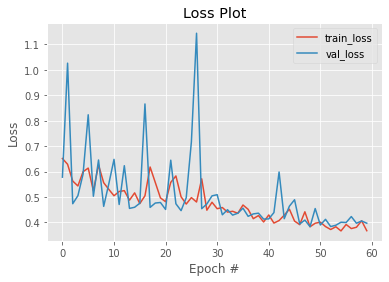

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 60), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 60), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

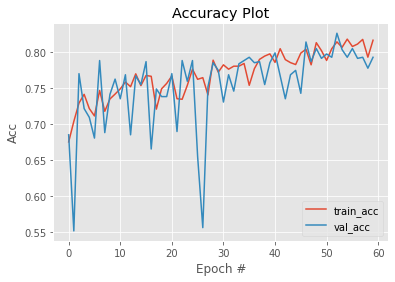

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 60), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 60), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['benign', 'malignant'] #target

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)
labels = np.argmax(labels, axis=1)#memberikan indeks angka terbesar di axis=1
print('model 1') #ini print
print(classification_report(y_test,  labels, target_names=target_names)) #ini print classification report

model 1
              precision    recall  f1-score   support

      benign       0.83      0.77      0.80       360
   malignant       0.75      0.82      0.78       300

    accuracy                           0.79       660
   macro avg       0.79      0.79      0.79       660
weighted avg       0.80      0.79      0.79       660

